In [ ]:
import pandas as pd
import re
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel(r'C:\Users\gabrielioliveira-ieg\OneDrive - Instituto J&F\2G\interdisciplinar\Analise-Exploratoria\tratar-base\pesquisa-viajou.xlsx')

Alterando nome das colunas

In [3]:
colunas = ['id','hora_inicio','hora_conclusao','email','nome','idade','genero','municipio_residencia','visita_pontos_turisticos','participa_eventos','frequencia_eventos','tipos_eventos_preferidos','participa_excursões','frequencia_tours_virtuais','frequencia_apps_turismo','usou_apps_turismo','confianca_avaliacoes','interesse_acessibilidade','pagaria_por_tour_virtual','descoberta_eventos_atracoes','motivacao_uso_app_turismo','probabilidade_recomendar']

df.columns = colunas
df.drop(['id', 'hora_inicio', 'hora_conclusao', 'email', 'nome'], axis=1, inplace=True)


df['municipio_residencia']

0      São Paulo (capital)
1      São Paulo (capital)
2      São Paulo (capital)
3      São Paulo (capital)
4                   Osasco
              ...         
130    São Paulo (capital)
131    São Paulo (capital)
132    São Paulo (capital)
133    São Paulo (capital)
134              Guarulhos
Name: municipio_residencia, Length: 135, dtype: object

Limpando dados desnecessários

Arrays permitidos

In [5]:
municipios_permitidos = ['São Paulo', 'Osasco', 'Guarulhos', 'Atibaia', 'Carapicuíba ', 'Barueri', 'Caieiras', 'São Bernardo do Campo', 'Santana de Parnaíba.']

tipos_eventos_permitidos = [
    'Musicais',
    'Teatrais',
    'Culturais',
    'Gastronômicos',
    'Esportivos',
    'Eletrônicos'
]

descoberta_eventos_atracoes_permitidos = [
    'Redes Sociais',
    'Sites de Turismo',
    'Blogs e Sites de Viagem',
    'Aplicativos de Turismo',
    'Recomendações de Amigos e Família',
    'Agências de Viagem e Operadoras de Turismo'
]

motivacao_uso_app_turismo_permitidos = [
    'Encontrar Novas Experiências',
    'Obter Informações Detalhadas',
    'Reservar Ingressos e Excursões',
    'Receber Recomendações Personalizadas',
    'Acompanhar Eventos e Ofertas Especiais',
    'Nenhuma das opções'
]

In [6]:
df = df.map(lambda x: re.sub(r"\s*\([^)]*\)", "", x) if isinstance(x, str) else x)

df['municipio_residencia'] = df['municipio_residencia'].apply(lambda x: x if x in municipios_permitidos else None)

df['descoberta_eventos_atracoes'] = df['descoberta_eventos_atracoes'].apply(lambda x: [item for item in x.split(';') if item.strip() in descoberta_eventos_atracoes_permitidos] if isinstance(x, str) else x)
df['descoberta_eventos_atracoes'] = df['descoberta_eventos_atracoes'].apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)
df['descoberta_eventos_atracoes'] = df['descoberta_eventos_atracoes'].apply(lambda x: x if isinstance(x, list) and len(x) > 0 else None)
df['descoberta_eventos_atracoes'] = df['descoberta_eventos_atracoes'].apply(lambda x: sorted(x) if isinstance(x, list) else x)

df['tipos_eventos_preferidos'] = df['tipos_eventos_preferidos'].apply(lambda x: [item for item in x.split(';') if item.strip() in tipos_eventos_permitidos] if isinstance(x, str) else x)
df['tipos_eventos_preferidos'] = df['tipos_eventos_preferidos'].apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)
df['tipos_eventos_preferidos'] = df['tipos_eventos_preferidos'].apply(lambda x: x if isinstance(x, list) and len(x) > 0 else None)
df['tipos_eventos_preferidos'] = df['tipos_eventos_preferidos'].apply(lambda x: sorted(x) if isinstance(x, list) else x)

df['motivacao_uso_app_turismo'] = df['motivacao_uso_app_turismo'].apply(
    lambda x: x if x in motivacao_uso_app_turismo_permitidos else None
)

In [ ]:
df.describe()

In [ ]:
scaler = StandardScaler()
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

In [7]:
df = df.dropna()

df.to_excel('viajou-tratado.xlsx', index=False)

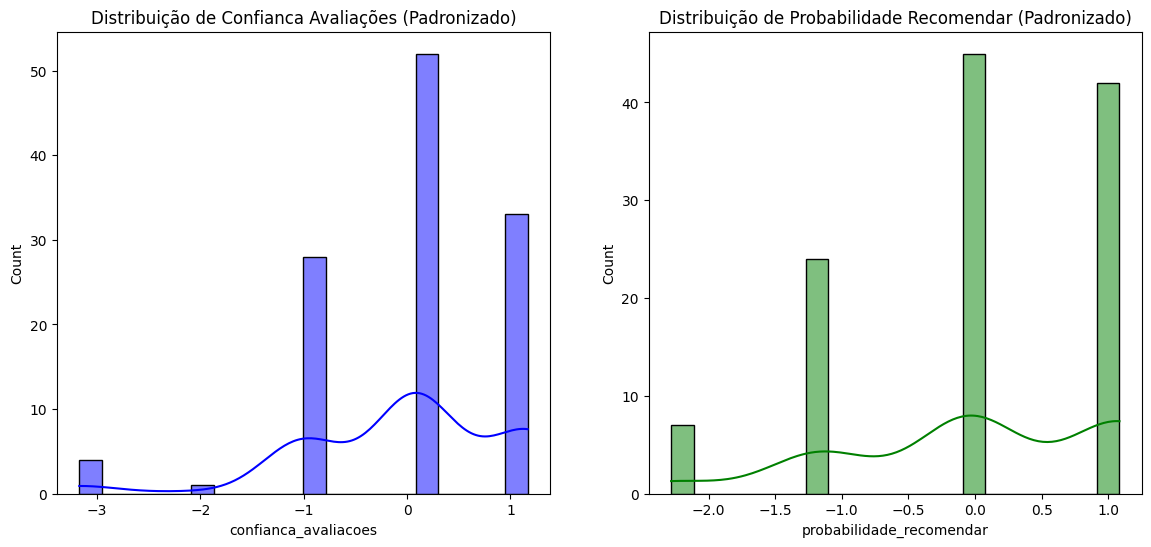

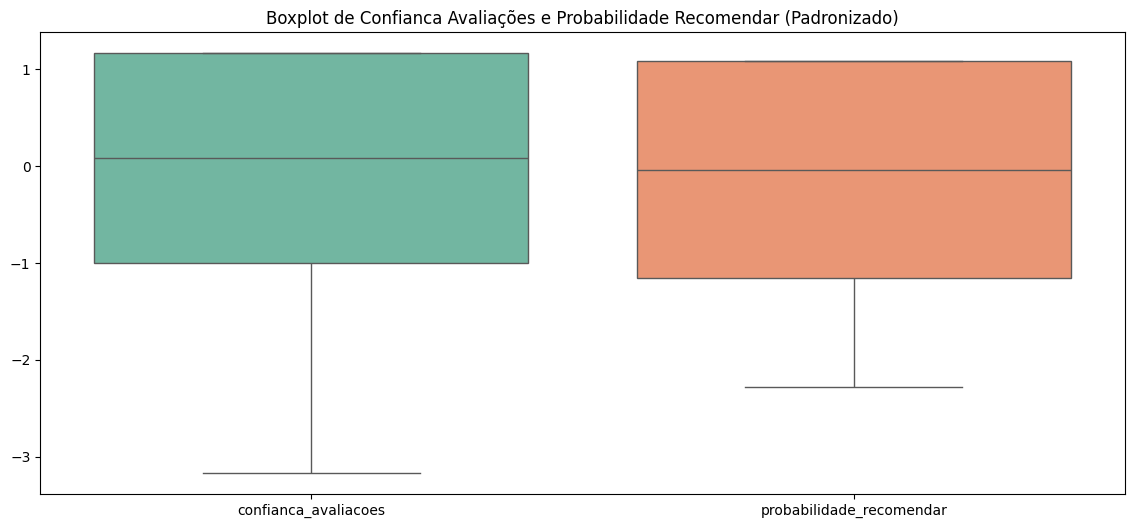

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de confianca_avaliacoes
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['confianca_avaliacoes'], kde=True, bins=20, color='blue')
plt.title('Distribuição de Confianca Avaliações (Padronizado)')

# Histograma de probabilidade_recomendar
plt.subplot(1, 2, 2)
sns.histplot(df['probabilidade_recomendar'], kde=True, bins=20, color='green')
plt.title('Distribuição de Probabilidade Recomendar (Padronizado)')

plt.show()

# Boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['confianca_avaliacoes', 'probabilidade_recomendar']], palette="Set2")
plt.title('Boxplot de Confianca Avaliações e Probabilidade Recomendar (Padronizado)')
plt.show()
